# Shamecca Marshall
# Data 608 - Story 3

### Task
The CDC publishes firearm mortality for each State per 100,000 persons https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm. Each State' firearm control laws can be categorized as very strict to very lax. The purpose of this Story is to answer the question, " Do stricter firearm control laws help reduce firearm mortality?"

For this assignment you will need to:

Access the firearm mortality data from the CDC using an available API (https://open.cdc.gov/apis.html)

Create a 5 point Likert scale categorizing gun control laws from most lax to strictest and assign each state to the most appropriate Likert bin.

Determine wether stricter gun control laws result in reduced gun violence deaths

Present your story using  heat maps

### Importing libraries & retrieveing the data from the API

For this task, I acquired the data from the Centers for Disease Control and Prevention (CDC) API, accessed via this link: https://data.cdc.gov/

Subsequently, I navigated to the Injury & Violence category, where I conducted a search for firearm mortality data. One relevant result titled "NCHS - VSRR Quarterly provisional estimates for selected indicators of mortality" was found at this link: https://data.cdc.gov/browse?q=firearm%20mortality%20data&sortBy=relevance. I extracted the API endpoint from this source: https://dev.socrata.com/foundry/data.cdc.gov/489q-934x. Finally, I utilized Python libraries to fetch the data via response requests in JSON format, as opposed to CSV.

In [8]:
import requests  # Importing the requests library to make HTTP requests
import pandas as pd  # Importing pandas library for handling data as DataFrame

url = "https://data.cdc.gov/resource/489q-934x.json"  # URL to fetch data from

response = requests.get(url)  # Sending a GET request to the URL and storing the response

if response.status_code == 200:  # Checking if the response status code is 200 (indicating success)
    data = response.json()  # Converting the JSON response to Python data (a list or dictionary)
    df_mortality = pd.DataFrame(data)  # Creating a DataFrame from the JSON data
else:
    print("Error: Unable to retrieve data from the URL.")  # Printing an error message if request fails

print(df_mortality.head())  # Printing the first few rows of the DataFrame

  year_and_quarter                    time_period  \
0          2021 Q1  12 months ending with quarter   
1          2021 Q1  12 months ending with quarter   
2          2021 Q1  12 months ending with quarter   
3          2021 Q1  12 months ending with quarter   
4          2021 Q1  12 months ending with quarter   

                        cause_of_death     rate_type                unit  \
0                           All causes  Age-adjusted  Deaths per 100,000   
1                    Alzheimer disease  Age-adjusted  Deaths per 100,000   
2                             COVID-19  Age-adjusted  Deaths per 100,000   
3                               Cancer  Age-adjusted  Deaths per 100,000   
4  Chronic liver disease and cirrhosis  Age-adjusted  Deaths per 100,000   

  rate_overall rate_sex_female rate_sex_male rate_alaska rate_alabama  ...  \
0        866.3           716.3        1040.4       779.2       1123.4  ...   
1         32.1            36.8          24.8        28.2         51.

In [10]:
df_mortality

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_alaska,rate_alabama,...,rate_age_1_4,rate_age_5_14,rate_age_15_24,rate_age_25_34,rate_age_35_44,rate_age_45_54,rate_age_55_64,rate_65_74,rate_age_75_84,rate_age_85_plus
0,2021 Q1,12 months ending with quarter,All causes,Age-adjusted,"Deaths per 100,000",866.3,716.3,1040.4,779.2,1123.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021 Q1,12 months ending with quarter,Alzheimer disease,Age-adjusted,"Deaths per 100,000",32.1,36.8,24.8,28.2,51.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021 Q1,12 months ending with quarter,COVID-19,Age-adjusted,"Deaths per 100,000",120.7,94,153.9,44.4,160.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021 Q1,12 months ending with quarter,Cancer,Age-adjusted,"Deaths per 100,000",142,122.8,167.7,143,160.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021 Q1,12 months ending with quarter,Chronic liver disease and cirrhosis,Age-adjusted,"Deaths per 100,000",13.9,9.8,18.3,23.6,17.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2023 Q2,3-month period,Pneumonitis due to solids and liquids,Crude,"Deaths per 100,000",5.7,4.8,6.6,2.7,4.5,...,NaN,NaN,0.1,0.3,0.5,1.4,3.6,10.4,29.8,113.8
876,2023 Q2,3-month period,Septicemia,Crude,"Deaths per 100,000",11.9,11.9,12,9.9,21.4,...,0.4,0.2,0.3,0.8,2.2,6,12.8,29.3,61.8,136.9
877,2023 Q2,3-month period,Stroke,Crude,"Deaths per 100,000",47,52.7,41.2,19.7,60.2,...,0.4,0.2,0.4,1.2,4.8,13.4,30.1,77.5,248.7,965.6
878,2023 Q2,3-month period,Suicide,Crude,"Deaths per 100,000",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After successfully retrieving the data from the CDC API, I proceeded to filter the dataframe to specifically examine mortality rates related to "Firearm-related injury" with the type categorized as "Crude". For the temporal analysis, I specifically chose a 12-month period ending with a quarter.

In [14]:
# Filtering DataFrame based on certain conditions
df_gun = df_mortality[df_mortality['cause_of_death'] == "Firearm-related injury"]
df_gun = df_gun[df_gun['rate_type'] == "Crude"]
df_gun = df_gun[df_gun['time_period'] == "12 months ending with quarter"]

# Creating DataFrame with row names as NULL
df_gun = pd.DataFrame(df_gun.reset_index(drop=True))
df_gun
     

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_alaska,rate_alabama,...,rate_age_1_4,rate_age_5_14,rate_age_15_24,rate_age_25_34,rate_age_35_44,rate_age_45_54,rate_age_55_64,rate_65_74,rate_age_75_84,rate_age_85_plus
0,2021 Q1,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.1,3.9,24.5,23.1,24.2,...,0.8,1.7,23,23.6,17.3,13.6,11.7,10.9,15.1,16
1,2021 Q2,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.4,4,25,25.1,24.8,...,0.8,1.7,23.7,24.7,17.7,13.8,11.7,11,15.7,17.3
2,2021 Q3,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.6,4.1,25.3,24.4,25.4,...,0.8,1.7,23.7,25,18,14,11.7,11.3,16.1,17.8
3,2021 Q4,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.7,4.2,25.5,24.8,26.1,...,0.9,1.6,23.5,24.8,18.1,14.5,12.1,11.7,16.2,18.3
4,2022 Q1,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.8,4.1,25.6,25.8,25.4,...,1,1.6,23.3,24.5,18.4,14.7,12.3,11.7,16.3,19.2
5,2022 Q2,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.8,4.2,25.6,23.7,25.2,...,1,1.6,22.4,24.2,18.4,14.9,12.9,12.1,16.6,18.1
6,2022 Q3,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.7,4.2,25.3,23.4,25.6,...,0.9,1.6,21.9,23.6,18.3,14.9,13.1,12.1,16.3,18.6
7,2022 Q4,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.5,4.1,25,22.4,25.2,...,0.9,1.5,21.1,22.9,18.1,14.8,13.4,11.9,16.5,18.5
8,2023 Q1,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.4,4.1,24.8,21.5,26.1,...,0.8,1.6,21,22.5,18,14.7,13.5,12,16.3,17.7
9,2023 Q2,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I reformatted the data by assigning state abbreviations, simplifying the dataset and making it more visually presentable in the heatmap.

In [16]:
# Mapping state abbreviations to full names
state_abbreviations = {
    "AL": "alabama", "AK": "alaska", "AZ": "arizona", "AR": "arkansas", "CA": "california",
    "CO": "colorado", "CT": "connecticut", "DE": "delaware", "FL": "florida", "GA": "georgia",
    "HI": "hawaii", "ID": "idaho", "IL": "illinois", "IN": "indiana", "IA": "iowa",
    "KS": "kansas", "KY": "kentucky", "LA": "louisiana", "ME": "maine", "MD": "maryland",
    "MA": "massachusetts", "MI": "michigan", "MN": "minnesota", "MS": "mississippi", "MO": "missouri",
    "MT": "montana", "NE": "nebraska", "NV": "nevada", "NH": "new_hampshire", "NJ": "new_jersey",
    "NM": "new_mexico", "NY": "new_york", "NC": "north_carolina", "ND": "north_dakota",
    "OH": "ohio", "OK": "oklahoma", "OR": "oregon", "PA": "pennsylvania", "RI": "rhode_island",
    "SC": "south_carolina", "SD": "south_dakota", "TN": "tennessee", "TX": "texas", "UT": "utah",
    "VT": "vermont", "VA": "virginia", "WA": "washington", "WV": "west_virginia", "WI": "wisconsin",
    "WY": "wyoming", "DC": "district_of_columbia"
}

# Looping through each state abbreviation
for abbrev, full_name in state_abbreviations.items():
    pattern = "rate_" + full_name
    df_gun.columns = df_gun.columns.str.replace(pattern, abbrev)

state_abbreviations

{'AL': 'alabama',
 'AK': 'alaska',
 'AZ': 'arizona',
 'AR': 'arkansas',
 'CA': 'california',
 'CO': 'colorado',
 'CT': 'connecticut',
 'DE': 'delaware',
 'FL': 'florida',
 'GA': 'georgia',
 'HI': 'hawaii',
 'ID': 'idaho',
 'IL': 'illinois',
 'IN': 'indiana',
 'IA': 'iowa',
 'KS': 'kansas',
 'KY': 'kentucky',
 'LA': 'louisiana',
 'ME': 'maine',
 'MD': 'maryland',
 'MA': 'massachusetts',
 'MI': 'michigan',
 'MN': 'minnesota',
 'MS': 'mississippi',
 'MO': 'missouri',
 'MT': 'montana',
 'NE': 'nebraska',
 'NV': 'nevada',
 'NH': 'new_hampshire',
 'NJ': 'new_jersey',
 'NM': 'new_mexico',
 'NY': 'new_york',
 'NC': 'north_carolina',
 'ND': 'north_dakota',
 'OH': 'ohio',
 'OK': 'oklahoma',
 'OR': 'oregon',
 'PA': 'pennsylvania',
 'RI': 'rhode_island',
 'SC': 'south_carolina',
 'SD': 'south_dakota',
 'TN': 'tennessee',
 'TX': 'texas',
 'UT': 'utah',
 'VT': 'vermont',
 'VA': 'virginia',
 'WA': 'washington',
 'WV': 'west_virginia',
 'WI': 'wisconsin',
 'WY': 'wyoming',
 'DC': 'district_of_columbia

After finishing the extraction of the year and filtering the data, I organized it neatly and assigned gun law ranks to each state through mapping.

In [110]:
# Data type conversion: columns 6 to 69 are converted to double.
df_gun.iloc[:, 6:70] = df_gun.iloc[:, 6:70].apply(pd.to_numeric)

# Extracting year from year_and_quarter and grouping by year
df_gun['year'] = df_gun['year_and_quarter'].str[:1]
df_gun_grouped = df_gun.groupby('year')

# Filtering data for the year 2023 Q1
df_gun_2023 = df_gun[df_gun['year_and_quarter'] == "2023 Q1"]

In [112]:
from prettytable import PrettyTable 

# Pivoting long
df_gun_2023_long = df_gun_2023.melt(id_vars=['year', 'year_and_quarter'],
                                     value_vars=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                                                 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                                                 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE',
                                                 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
                                                 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
                                                 'WY'],
                                     var_name='state',
                                     value_name='rate')

# Selecting specific columns for final DataFrame
final_df = df_gun_2023_long[['year', 'state', 'rate']]

# Add gun law rank to final_df
final_df['gun_laws'] = final_df['state'].map({
    "AK": "1", "AL": "1", "AR": "1", "AZ": "1", "GA": "1", "IA": "1", "ID": "1", "IN": "1", "KS": "1",
    "KY": "1", "LA": "1", "ME": "1", "MO": "1", "MS": "1", "MT": "1", "ND": "1", "NH": "1", "OH": "1",
    "OK": "1", "SC": "1", "SD": "1", "TN": "1", "TX": "1", "UT": "1", "WV": "1", "WY": "1",
    "WI": "2",
    "FL": "3", "MI": "3", "MN": "3", "NC": "3", "NE": "3", "NM": "3", "NV": "3", "VT": "3",
    "CO": "4", "DE": "4", "OR": "4", "PA": "4", "RI": "4", "VA": "4", "WA": "4",
    "CA": "5", "CT": "5", "DC": "5", "HI": "5", "IL": "5", "MA": "5", "MD": "5", "NJ": "5", "NY": "5"
})

# Converting gun_laws and year to numeric type
final_df['gun_laws'] = pd.to_numeric(final_df['gun_laws'])
final_df['year'] = pd.to_numeric(final_df['year'])

# Displaying final DataFrame
print(final_df)

    year state  rate  gun_laws
0      2    AK  21.5         1
1      2    AL  26.1         1
2      2    AR  22.9         1
3      2    AZ  20.7         1
4      2    CA   8.9         5
5      2    CO  17.8         4
6      2    CT   6.6         5
7      2    DC  25.3         5
8      2    DE  12.6         4
9      2    FL  14.8         3
10     2    GA  19.5         1
11     2    HI   4.4         5
12     2    IA  12.3         1
13     2    ID  17.7         1
14     2    IL  14.3         5
15     2    IN  18.2         1
16     2    KS  16.0         1
17     2    KY  18.2         1
18     2    LA  27.4         1
19     2    MA   3.8         5
20     2    MD  12.8         5
21     2    ME  12.7         1
22     2    MI  14.5         3
23     2    MN   9.6         3
24     2    MO  23.5         1
25     2    MS  28.3         1
26     2    MT  23.4         1
27     2    NC  16.8         3
28     2    ND  14.0         1
29     2    NE  11.4         3
30     2    NH  11.6         1
31     2

Following that, I developed a mapping dictionary for a Likert scale, which facilitated the creation of a heatmap categorized according to gun control law ranks. Subsequently, I implemented Likert scale categorization based on these ranks.

In [100]:
# Creating a mapping dictionary for Likert scale
likert_scale_mapping = {
    1: "Very Lax",
    2: "Lax",
    3: "Moderate",
    4: "Strict",
    5: "Very Strict"
}

# Applying Likert scale categorization based on gun control law ranks
final_df['likert_scale'] = final_df['gun_laws'].map(likert_scale_mapping)

# Displaying final DataFrame with Likert scale
print(final_df)

    year state  rate  gun_laws likert_scale
0   2023    AK  21.5         1     Very Lax
1   2023    AL  26.1         1     Very Lax
2   2023    AR  22.9         1     Very Lax
3   2023    AZ  20.7         1     Very Lax
4   2023    CA   8.9         5  Very Strict
5   2023    CO  17.8         4       Strict
6   2023    CT   6.6         5  Very Strict
7   2023    DC  25.3         5  Very Strict
8   2023    DE  12.6         4       Strict
9   2023    FL  14.8         3     Moderate
10  2023    GA  19.5         1     Very Lax
11  2023    HI   4.4         5  Very Strict
12  2023    IA  12.3         1     Very Lax
13  2023    ID  17.7         1     Very Lax
14  2023    IL  14.3         5  Very Strict
15  2023    IN  18.2         1     Very Lax
16  2023    KS  16.0         1     Very Lax
17  2023    KY  18.2         1     Very Lax
18  2023    LA  27.4         1     Very Lax
19  2023    MA   3.8         5  Very Strict
20  2023    MD  12.8         5  Very Strict
21  2023    ME  12.7         1  

In [114]:
# Sort the DataFrame by the "rate" column in descending order
final_df_sorted = final_df.sort_values(by='rate', ascending=False)

# Print the sorted DataFrame with Likert scale
print(final_df_sorted[['state', 'rate', 'gun_laws']])

   state  rate  gun_laws
25    MS  28.3         1
18    LA  27.4         1
32    NM  26.9         3
1     AL  26.1         1
7     DC  25.3         5
24    MO  23.5         1
26    MT  23.4         1
2     AR  22.9         1
40    SC  21.8         1
0     AK  21.5         1
42    TN  21.4         1
3     AZ  20.7         1
50    WY  20.4         1
10    GA  19.5         1
36    OK  19.4         1
33    NV  19.4         3
49    WV  18.6         1
17    KY  18.2         1
15    IN  18.2         1
5     CO  17.8         4
13    ID  17.7         1
27    NC  16.8         3
16    KS  16.0         1
35    OH  15.6         1
37    OR  15.3         4
43    TX  15.0         1
45    VA  14.9         4
9     FL  14.8         3
38    PA  14.6         4
41    SD  14.6         1
22    MI  14.5         3
14    IL  14.3         5
44    UT  14.1         1
28    ND  14.0         1
48    WI  13.8         2
47    WA  13.2         4
46    VT  13.1         3
20    MD  12.8         5
21    ME  12.7         1


In [116]:
# Sort the DataFrame by the "gun_laws" column in descending order
final_df_sorted = final_df.sort_values(by='gun_laws', ascending=False)

# Print the sorted DataFrame with Likert scale
print(final_df_sorted[['state', 'rate', 'gun_laws']])

   state  rate  gun_laws
14    IL  14.3         5
4     CA   8.9         5
20    MD  12.8         5
6     CT   6.6         5
7     DC  25.3         5
19    MA   3.8         5
34    NY   5.0         5
31    NJ   5.0         5
11    HI   4.4         5
45    VA  14.9         4
38    PA  14.6         4
39    RI   3.7         4
37    OR  15.3         4
47    WA  13.2         4
8     DE  12.6         4
5     CO  17.8         4
27    NC  16.8         3
46    VT  13.1         3
9     FL  14.8         3
29    NE  11.4         3
22    MI  14.5         3
23    MN   9.6         3
32    NM  26.9         3
33    NV  19.4         3
48    WI  13.8         2
35    OH  15.6         1
36    OK  19.4         1
0     AK  21.5         1
40    SC  21.8         1
41    SD  14.6         1
43    TX  15.0         1
44    UT  14.1         1
49    WV  18.6         1
42    TN  21.4         1
25    MS  28.3         1
30    NH  11.6         1
28    ND  14.0         1
26    MT  23.4         1
1     AL  26.1         1


In [118]:
# Sort the DataFrame by the "state" column in descending order
final_df_sorted = final_df.sort_values(by='state', ascending=False)

# Print the sorted DataFrame with Likert scale
print(final_df_sorted[['state', 'rate', 'gun_laws']])     

   state  rate  gun_laws
50    WY  20.4         1
49    WV  18.6         1
48    WI  13.8         2
47    WA  13.2         4
46    VT  13.1         3
45    VA  14.9         4
44    UT  14.1         1
43    TX  15.0         1
42    TN  21.4         1
41    SD  14.6         1
40    SC  21.8         1
39    RI   3.7         4
38    PA  14.6         4
37    OR  15.3         4
36    OK  19.4         1
35    OH  15.6         1
34    NY   5.0         5
33    NV  19.4         3
32    NM  26.9         3
31    NJ   5.0         5
30    NH  11.6         1
29    NE  11.4         3
28    ND  14.0         1
27    NC  16.8         3
26    MT  23.4         1
25    MS  28.3         1
24    MO  23.5         1
23    MN   9.6         3
22    MI  14.5         3
21    ME  12.7         1
20    MD  12.8         5
19    MA   3.8         5
18    LA  27.4         1
17    KY  18.2         1
16    KS  16.0         1
15    IN  18.2         1
14    IL  14.3         5
13    ID  17.7         1
12    IA  12.3         1


Following that, I generated an interactive choropleth heatmap to illustrate the correlation between gun control laws (rates) and gun violence deaths (mortality rates). I established a Likert scale for mortality rates, categorizing states based on the severity of gun violence, ranging from safest to deadliest. Similarly, I defined a Likert scale for gun control laws, ranging from most lenient to most stringent, based on rates.

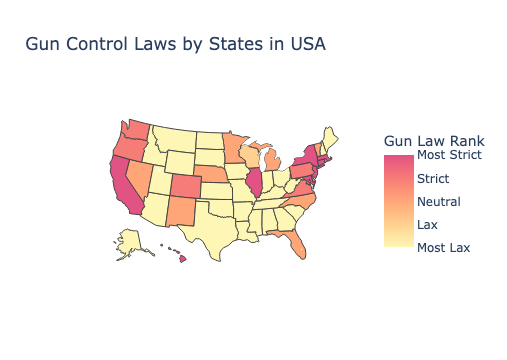

In [134]:
import pandas as pd
import plotly.graph_objects as go

# Define Likert scale categories based on gun laws ratings of each state
likert_scale = {
    1: 'Most Lax',
    2: 'Lax',
    3: 'Neutral',
    4: 'Strict',
    5: 'Most Strict'
}

# Convert 'rate' column to numeric, replacing any non-numeric values with NaN
final_df['rate'] = pd.to_numeric(final_df['rate'], errors='coerce')

# Plotting choropleth interactive heat map to visualize the relationship between gun control laws and gun violence deaths
fig = go.Figure(data=go.Choropleth(
    locations=final_df['state'],  # States
    z=final_df['gun_laws'],  # Values to be color-coded based on gun laws
    locationmode='USA-states',  # Set plot type to US states
    colorscale='pinkyl',  # valid colorscale name
    colorbar=dict(
        title='Gun Law Rank',
        tickvals=list(likert_scale.keys()),
        ticktext=list(likert_scale.values()),
        len=0.75
    ),  # Colorbar configuration
    text=final_df['gun_laws'].map(likert_scale),  # Hover text based on Likert scale
))

# Update layout of Choropleth Interactive Heat Map: Gun Control Laws by State
fig.update_layout(
    title='Gun Control Laws by States in USA',
    geo=dict(scope='usa',  # Set map scope to USA
             projection_type='albers usa'),  # Albers USA projection
    xaxis_title='Gun Control Laws (Likert Scale)',
    yaxis_title='State'
)

# Show plot
fig.show()

### Choropleth Heat Maps depicting Gun Violence Deaths (Mortality Rate) & Gun Control Laws (Rank)

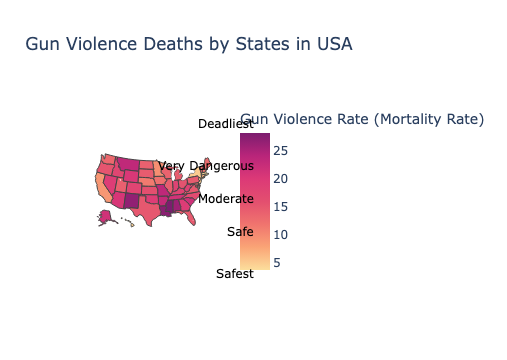

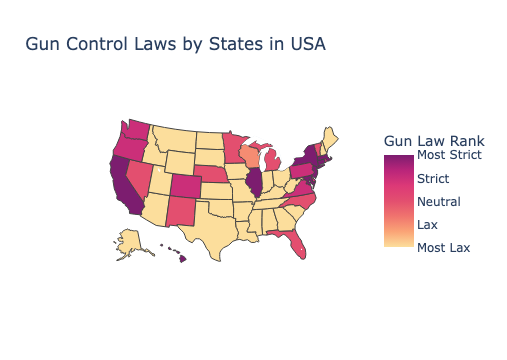

In [136]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'rate' column to numeric, replacing any non-numeric values with NaN
final_df['rate'] = pd.to_numeric(final_df['rate'], errors='coerce')

# Plotting choropleth interactive heat map to visualize the relationship between gun control laws and gun violence deaths
fig = go.Figure(data=go.Choropleth(
    locations=final_df['state'],  # States
    z=final_df['rate'],  # Values to be color-coded
    locationmode='USA-states',  # Set plot type to US states
    colorscale='sunsetdark',  # valid colorscale name
    colorbar=dict(title='Gun Violence Rate (Mortality Rate)'),  # Colorbar title
))

# Update layout of Choropleth Interactive Heat Map: Gun Violence Deaths by State and Gun Control Laws
fig.update_layout(
    title='Gun Violence Deaths by States in USA',
    geo=dict(scope='usa',  # Set map scope to USA
             projection_type='albers usa'),  # Albers USA projection
    xaxis_title='Gun Control Laws (Likert Scale)',
    yaxis_title='State'
)

# Define Likert scale categories with reversed order for gun violence deaths
likert_scale = {
    1: 'Safest',
    2: 'Safe',
    3: 'Moderate',
    4: 'Very Dangerous',
    5: 'Deadliest'
}

# Determine positions for each Likert scale category based on the range of values
likert_positions = {
    category: idx / (len(likert_scale) - 0.7) - 0.01
    for idx, category in enumerate(likert_scale.keys())
}

# Add annotations for Likert scale on the left side
for category, label in likert_scale.items():
    fig.add_annotation(
        x=1.20, y=likert_positions[category],  # Positioning the annotation on the right
        xref='paper', yref='paper',  # Define the reference point
        text=label,  # Text to display
        showarrow=False,  # Don't show arrow
        font=dict(size=12, color='black'),  # Font settings
    )

# Show plot
fig.show()

# SECOND HEATMAP ------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Define Likert scale categories based on gun laws ratings of each state
likert_scale = {
    1: 'Most Lax',
    2: 'Lax',
    3: 'Neutral',
    4: 'Strict',
    5: 'Most Strict'
}

# Convert 'rate' column to numeric, replacing any non-numeric values with NaN
final_df['rate'] = pd.to_numeric(final_df['rate'], errors='coerce')

# Plotting choropleth interactive heat map to visualize the relationship between gun control laws and gun violence deaths
fig = go.Figure(data=go.Choropleth(
    locations=final_df['state'],  # States
    z=final_df['gun_laws'],  # Values to be color-coded based on gun laws
    locationmode='USA-states',  # Set plot type to US states
    colorscale='sunsetdark',  # valid colorscale name
    colorbar=dict(
        title='Gun Law Rank',
        tickvals=list(likert_scale.keys()),
        ticktext=list(likert_scale.values()),
        len=0.75
    ),  # Colorbar configuration
    text=final_df['gun_laws'].map(likert_scale),  # Hover text based on Likert scale
))

# Update layout of Choropleth Interactive Heat Map: Gun Control Laws by State
fig.update_layout(
    title='Gun Control Laws by States in USA',
    geo=dict(scope='usa',  # Set map scope to USA
             projection_type='albers usa'),  # Albers USA projection
    xaxis_title='Gun Control Laws (Likert Scale)',
    yaxis_title='State'
)

# Show plot
fig.show()


# Conclusion
Based on the data depicted in the choropleth heat maps, during the year 2023, individuals residing in Mississippi faced heightened vulnerability to gun violence deaths, with a mortality rate of 28.3 and the state's gun law rank being categorized as the least strict. Conversely, residents in Rhode Island exhibited a lower likelihood of being victims of gun violence deaths, with a mortality rate of 3.7 and the state's gun law rank classified as strict. Similarly, Massachusetts demonstrated a mortality rate of 3.8 for gun violence deaths, accompanied by the most stringent gun law rank.

The analysis reveals a clear trend: states with stricter gun laws exhibit lower rates of gun violence deaths. This observation is evidenced by the fact that eight states, including California, Hawaii, Illinois, New York, New Jersey, Maryland, Massachusetts, and Connecticut, boasting the strictest gun law ranks, display the safest to safe gun violence (mortality) rates on the Likert scale. Conversely, twenty-six states, including Montana, North Dakota, South Dakota, Idaho, Wyoming, Utah, Arizona, Alaska, Iowa, Missouri, Kansas, Oklahoma, Texas, Arkansas, Louisiana, Indiana, Ohio, West Virginia, Kentucky, Tennessee, Mississippi, Alabama, Georgia, South Carolina, New Hampshire, and Maine, with a gun law rank of 1 (Most Lax) on the Likert scale, exhibit moderate to deadliest gun violence (mortality) rates.

This analysis suggests a correlation between lax gun law ranks and higher rates of gun violence. States with lenient gun control laws tend to attract individuals engaged in criminal activities, psychopathy, or juvenile delinquency, contributing to higher rates of firearm-related crimes. Consequently, implementing stricter firearm control laws emerges as a crucial measure in reducing firearm mortality rates.